In [1]:
import numpy as np
from sklearn.model_selection import learning_curve, cross_val_score, KFold
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [2]:
import matplotlib.pyplot as plt

Cross-validation scores: [1.         0.96666667 0.93333333 0.93333333 0.93333333]
Mean cross-validation accuracy: 0.9533333333333335


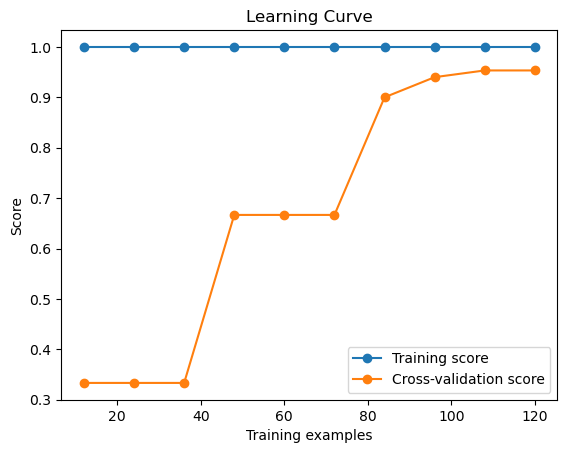

In [3]:


# Example dataset
data = load_iris()
X, y = data.data, data.target

# Define base classifiers
clf1 = GaussianNB()
clf2 = DecisionTreeClassifier(random_state=42)

# Create a soft voting classifier
ensemble_clf = VotingClassifier(estimators=[('gnb', clf1), ('dt', clf2)], voting='soft')

# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(ensemble_clf, X, y, cv=kf)
print("Cross-validation scores:", scores)
print("Mean cross-validation accuracy:", np.mean(scores))

# Learning curve
train_sizes, train_scores, valid_scores = learning_curve(
    ensemble_clf, X, y, cv=kf, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score')
plt.plot(train_sizes, valid_scores_mean, 'o-', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend()
plt.title('Learning Curve')
plt.show()
